<a href="https://colab.research.google.com/github/HyeongseokKim/My_codes/blob/main/04_06_LightGBM%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab 한글 깨짐 해결 위한 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 재시작 !

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,936 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and di

In [1]:
# matplotlib 설정
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

import numpy as np

# LightGBM

- LightGBM 역시 사이킷런에서 제공하지 않기 떄문에 별도의 설치가 필요하다.
- https://lightgbm.readthedocs.io/en/latest/index.html (LightGBM 공식문서)를 참고하여 설치

- LightGBM은 XGBoost보다 더 빠른 연산이 가능하고 메모리도 적게 사용한다 그러한 측면에서 대용량 데이터 셋에서 효율적이다. 그러나 너무 작은 데이터 셋에서는 과적합 될 우려가 높으니 주의하자.

In [2]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()

### LightGBM의 파라미터
- xgboost의 파라미터와 거의 동일하다.
- max_depth : 트리의 깊이를 조정하는 파라미터
- n_estimators : 반복할 결정 트리의 개수
- learning_rate : 학습기 마다 가중치를 얼마나 줄 것인지를 설정하는 파라미터
- boosting_type : xgboost의 booster파라미터와 같은 역할을 하지만 지원하는 모델이 다르다, gbdt(Gradient Boosted Decision Trees), rf(Random Forest), dart, goss(Gradient-based One-Sied Sampling)가 있다.
    - goss는 계산속도를 줄여 주지만 예측력에서 손실이 있을 수 있다.
- reg_alpha : L1 규제
- reg_lambda : L2 규제

In [3]:
lgb_model

LGBMClassifier()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target,
                                                   shuffle = True)

lgb_model = lgb.LGBMClassifier(max_depth=3, n_estimators=9,
                               learning_rate=0.1).fit(X_train, y_train)

In [5]:
print('train score : {:.3f}'.format(lgb_model.score(X_train, y_train)))
print('test score : {:.3f}'.format(lgb_model.score(X_test, y_test)))

train score : 0.960
test score : 0.965


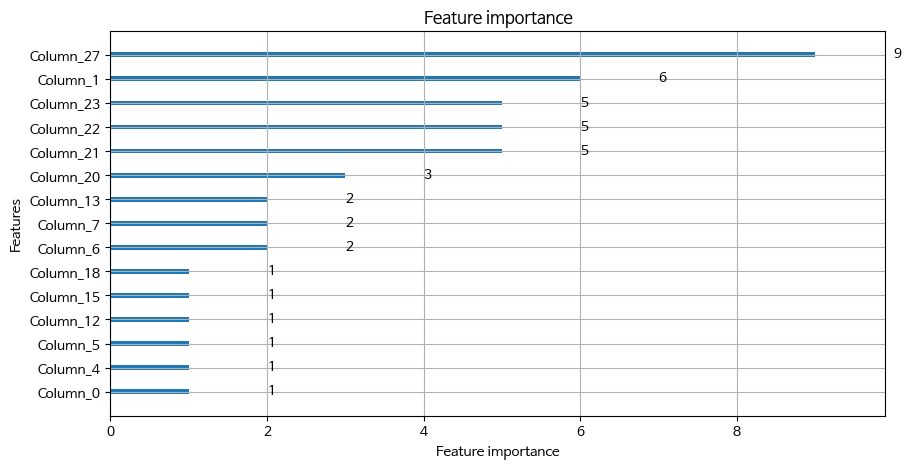

In [6]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize = (10, 5))
plot_importance(lgb_model, ax=ax)
plt.show()

- XGBoost와 동일하게 plot_importance로 특성들의 유효성을 확인할 수 있다.

<Axes: >

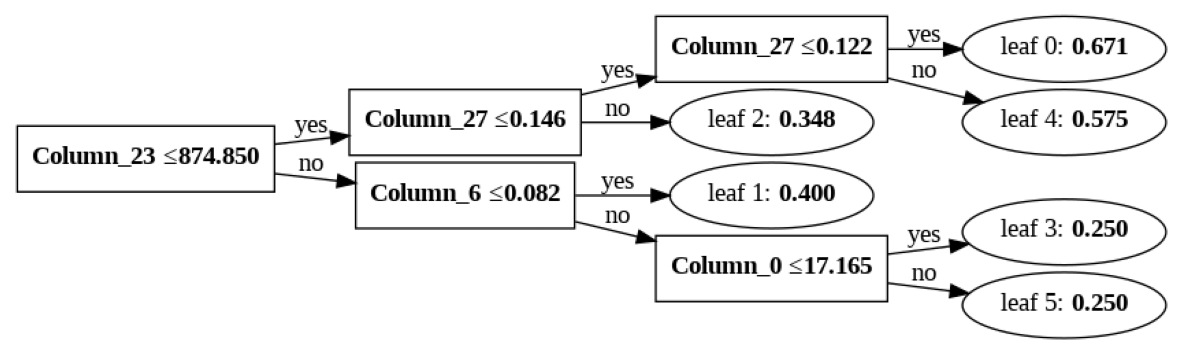

In [7]:
from lightgbm import plot_tree
fig, ax = plt.subplots(figsize = (15, 10))
plot_tree(lgb_model, ax=ax)

- plot_tree를 이용해서 LightGBM의 트리구조를 시각화할 수 있다.

In [8]:
from sklearn.datasets import load_wine

wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   test_size = 0.3, shuffle = True)

In [16]:
lgb_model = lgb.LGBMClassifier(max_depth=3, n_estimators=100,
                               learning_rate=0.003).fit(X_train, y_train)

print('train score : {:.3f}'.format(lgb_model.score(X_train, y_train)))
print('test score : {:.3f}'.format(lgb_model.score(X_test, y_test)))

train score : 0.968
test score : 0.926


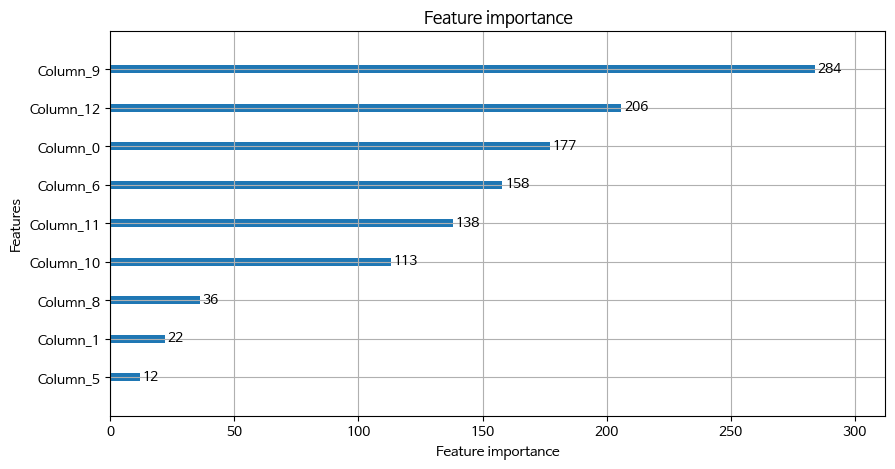

In [17]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_importance(lgb_model, ax=ax)
plt.show()

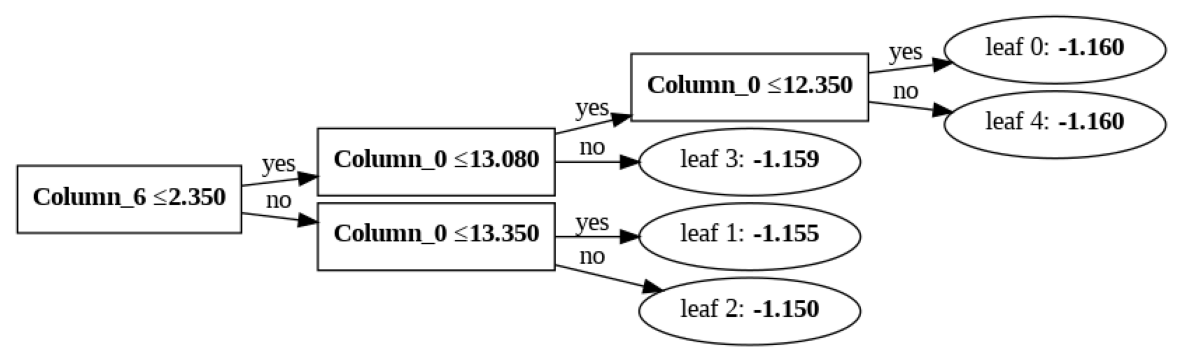

In [18]:
fig, ax = plt.subplots(figsize = (15, 10))
plot_tree(lgb_model, ax=ax)
plt.show()